##Importando bibliotecas:

In [28]:
# Imports
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
import pandas as pd

## Lendo dataset, separando dados de teste e treino, criando SVM com Kernel apropriado:

Primeiro vamos  ler o dataset e organizar o tipo categórico em númerico. "fire=1", "not fire=0"

In [34]:
#Lendo dataset
df = pd.read_csv("algerian_forest_fires.csv")
print(df.shape)
df.head()


(243, 14)


,day,month,year,temperature,RH,WS,rain,FFMC,DMC,DC,ISI,BUI,FWI,classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire


In [35]:
#como as classes são "fire" e "not fire" vamos converter para valores inteiros 0 e 1
df.loc[df.classes == "fire", 'classes'] = 1
df.loc[df.classes == "notfire", 'classes'] = 0
print(df.shape)
df.head()

(243, 14)


,day,month,year,temperature,RH,WS,rain,FFMC,DMC,DC,ISI,BUI,FWI,classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


Agora vamos separar os dados

In [37]:
#Separando entre dados de teste e treino
x = df[['temperature', 'RH', 'WS', 'rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]
print(x.shape)
y=df.loc[:,'classes']
print(y.shape)
y=y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(243, 10)
(243,)
(182, 10) (182,) (61, 10) (61,)


Agora vamos inicializar o SVM

In [38]:
#criando classificador com kernel linear, foi o que apresentou menos erro para o conjunto de dados
clf = svm.SVC(kernel='linear')

#Encontrando o modelo ajustado aos daods
clf = clf.fit(x_train, y_train)

##Predizendo dados, matriz de confusão:

Fazendo predição:

In [39]:
#Predizendo
predictions = clf.predict(x_test)

#Printando a diferença entre o dado predito e os dados de teste, caso dê 0 significa que foi correta a predição, caso dê 1 ou -1 significa que foi errada a predição
print(predictions-y_test.values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Gerando a matriz de confusão: 

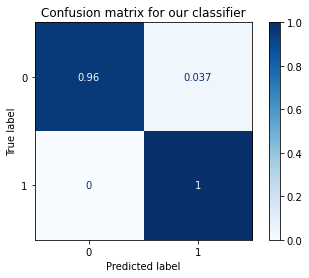

In [40]:
#gerando matriz e plotando
matrix = plot_confusion_matrix(clf, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)

A matriz de confusão mostra a proporção de predições corretas e incorretas do nosso modelo, quanto mais próximo de 1 (predicted label e true label), significa que as predições ocorreram na classe correta